In [1]:
#-*- coding: utf-8 -*-

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [174]:
phone_brand_device_model = pd.read_csv('phone_brand_device_model.csv')
gender_age_train = pd.read_csv('gender_age_train.csv')
label_categories = pd.read_csv('label_categories.csv')
events = pd.read_csv('events.csv')
app_labels = pd.read_csv('app_labels.csv')
app_events = pd.read_csv('app_events.csv', dtype = {'event_id' : np.int8, 'app_id' : np.int64, 
                                                   'is_installed' : np.int8, 'is_active' : np.int8})

In [3]:
gender_age_train.shape

(74645, 4)

In [4]:
# 대용량으로 인한 분할 (3등분)

app_events1 = app_events.iloc[:,]

In [5]:
english_phone_brands_mapping = {
    "三星": "samsung",
    "天语": "Ktouch",
    "海信": "hisense",
    "联想": "lenovo",
    "欧比": "obi",
    "爱派尔": "ipair",
    "努比亚": "nubia",
    "优米": "youmi",
    "朵唯": "dowe",
    "黑米": "heymi",
    "锤子": "hammer",
    "酷比魔方": "koobee",
    "美图": "meitu",
    "尼比鲁": "nibilu",
    "一加": "oneplus",
    "优购": "yougo",
    "诺基亚": "nokia",
    "糖葫芦": "candy",
    "中国移动": "ccmc",
    "语信": "yuxin",
    "基伍": "kiwu",
    "青橙": "greeno",
    "华硕": "asus",
    "夏新": "panosonic",
    "维图": "weitu",
    "艾优尼": "aiyouni",
    "摩托罗拉": "moto",
    "乡米": "xiangmi",
    "米奇": "micky",
    "大可乐": "bigcola",
    "沃普丰": "wpf",
    "神舟": "hasse",
    "摩乐": "mole",
    "飞秒": "fs",
    "米歌": "mige",
    "富可视": "fks",
    "德赛": "desci",
    "梦米": "mengmi",
    "乐视": "lshi",
    "小杨树": "smallt",
    "纽曼": "newman",
    "邦华": "banghua",
    "E派": "epai",
    "易派": "epai",
    "普耐尔": "pner",
    "欧新": "ouxin",
    "西米": "ximi",
    "海尔": "haier",
    "波导": "bodao",
    "糯米": "nuomi",
    "唯米": "weimi",
    "酷珀": "kupo",
    "谷歌": "google",
    "昂达": "ada",
    "聆韵": "lingyun",
    "小米": "Xiaomi",
    "华为": "Huawei",
    "魅族": "Meizu",
    "中兴": "ZTE",
    "酷派": "Coolpad",
    "金立": "Gionee",
    "SUGAR": "SUGAR",
    "OPPO": "OPPO",
    "vivo": "vivo",
    "HTC": "HTC",
    "LG": "LG",
    "ZUK": "ZUK",
    "TCL": "TCL",
    "LOGO": "LOGO",
    "SUGAR": "SUGAR",
    "Lovme": "Lovme",
    "PPTV": "PPTV",
    "ZOYE": "ZOYE",
    "MIL": "MIL",
    "索尼" : "Sony",
    "欧博信" : "Opssom",
    "奇酷" : "Qiku",
    "酷比" : "CUBE",
    "康佳" : "Konka",
    "亿通" : "Yitong",
    "金星数码" : "JXD",
    "至尊宝" : "Monkey King",
    "百立丰" : "Hundred Li Feng",
    "贝尔丰" : "Bifer",
    "百加" : "Bacardi",
    "诺亚信" : "Noain",
    "广信" : "Kingsun",
    "世纪天元" : "Ctyon",
    "青葱" : "Cong",
    "果米" : "Taobao",
    "斐讯" : "Phicomm",
    "长虹" : "Changhong",
    "欧奇" : "Oukimobile",
    "先锋" : "XFPLAY",
    "台电" : "Teclast",
    "大Q" : "Daq",
    "蓝魔" : "Ramos",
    "奥克斯" : "AUX"
}

phone_brand_device_model.phone_brand = phone_brand_device_model.phone_brand.map(pd.Series(english_phone_brands_mapping), na_action='ignore')

### group별 사용하는 model 비교

In [6]:
age_phone = pd.merge(gender_age_train, phone_brand_device_model, on = 'device_id')

In [7]:
age_phone.head()

,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,Xiaomi,MI 2
1,-2897161552818060146,M,35,M32-38,Xiaomi,MI 2
2,-8260683887967679142,M,35,M32-38,Xiaomi,MI 2
3,-4938849341048082022,M,30,M29-31,Xiaomi,红米note
4,245133531816851882,M,30,M29-31,Xiaomi,MI 3


In [8]:
g_model = pd.DataFrame(age_phone.groupby('phone_brand')['group'].value_counts().unstack())

In [9]:
g_model['sum'] = g_model.sum(axis = 1)
g_model = g_model.sort_values(by = 'sum', ascending = False).reset_index()

In [10]:
g_model.head(50)

group,phone_brand,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+,sum
0,Xiaomi,946.0,981.0,796.0,1098.0,1174.0,935.0,1929.0,2440.0,1379.0,1766.0,2147.0,1745.0,17336.0
1,samsung,682.0,760.0,590.0,1025.0,1360.0,1026.0,857.0,1420.0,964.0,1316.0,1929.0,1777.0,13706.0
2,Huawei,620.0,567.0,428.0,752.0,1106.0,784.0,1015.0,1508.0,932.0,1406.0,1938.0,1945.0,13001.0
3,OPPO,741.0,445.0,299.0,429.0,407.0,260.0,675.0,712.0,397.0,441.0,554.0,442.0,5802.0
4,vivo,801.0,525.0,345.0,414.0,355.0,220.0,692.0,700.0,350.0,396.0,466.0,394.0,5658.0
5,Meizu,326.0,262.0,179.0,202.0,181.0,156.0,833.0,947.0,443.0,455.0,444.0,282.0,4710.0
6,Coolpad,218.0,136.0,119.0,143.0,268.0,195.0,360.0,410.0,223.0,338.0,448.0,491.0,3349.0
7,lenovo,166.0,121.0,82.0,148.0,192.0,185.0,262.0,333.0,183.0,254.0,361.0,408.0,2695.0
8,Gionee,114.0,63.0,39.0,56.0,83.0,48.0,131.0,118.0,58.0,117.0,129.0,168.0,1124.0
9,HTC,56.0,57.0,31.0,55.0,65.0,57.0,109.0,149.0,65.0,127.0,133.0,111.0,1015.0


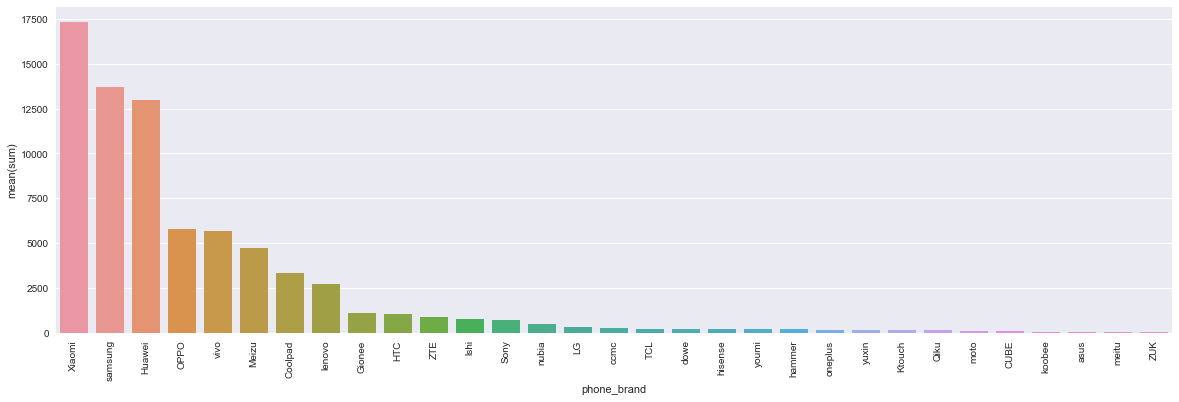

In [11]:
# 브랜드별 사용량 많은 순 30위

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize = (20,6))
plt.xticks(rotation='vertical')
sns.barplot(g_model.loc[:30,'phone_brand'], g_model['sum'])

In [12]:
# 여성 과 남성 분리

g_model_f = g_model.iloc[:,:7]
g_model_m = g_model.iloc[:,7:-1]
g_model_m.insert(0, 'phone_brand', g_model['phone_brand'])

# 제품별 sum

g_model_f['sum'] = g_model_f.sum(axis = 1)
g_model_m['sum'] = g_model_m.sum(axis = 1)

g_model_f = g_model_f
g_model_m = g_model_m

g_model_f['ratio'] = g_model_f['sum'].apply(lambda x : x / g_model_f['sum'].sum(axis = 0))
g_model_m['ratio'] = g_model_m['sum'].apply(lambda x : x / g_model_m['sum'].sum(axis = 0))

In [13]:
g_model_f.head(10)

group,phone_brand,F23-,F24-26,F27-28,F29-32,F33-42,F43+,sum,ratio
0,Xiaomi,946.0,981.0,796.0,1098.0,1174.0,935.0,5930.0,0.221343
1,samsung,682.0,760.0,590.0,1025.0,1360.0,1026.0,5443.0,0.203165
2,Huawei,620.0,567.0,428.0,752.0,1106.0,784.0,4257.0,0.158897
3,OPPO,741.0,445.0,299.0,429.0,407.0,260.0,2581.0,0.096338
4,vivo,801.0,525.0,345.0,414.0,355.0,220.0,2660.0,0.099287
5,Meizu,326.0,262.0,179.0,202.0,181.0,156.0,1306.0,0.048748
6,Coolpad,218.0,136.0,119.0,143.0,268.0,195.0,1079.0,0.040275
7,lenovo,166.0,121.0,82.0,148.0,192.0,185.0,894.0,0.033369
8,Gionee,114.0,63.0,39.0,56.0,83.0,48.0,403.0,0.015042
9,HTC,56.0,57.0,31.0,55.0,65.0,57.0,321.0,0.011982


In [14]:
g_model_m.head(10)

group,phone_brand,M22-,M23-26,M27-28,M29-31,M32-38,M39+,sum,ratio
0,Xiaomi,1929.0,2440.0,1379.0,1766.0,2147.0,1745.0,11406.0,0.237585
1,samsung,857.0,1420.0,964.0,1316.0,1929.0,1777.0,8263.0,0.172117
2,Huawei,1015.0,1508.0,932.0,1406.0,1938.0,1945.0,8744.0,0.182136
3,OPPO,675.0,712.0,397.0,441.0,554.0,442.0,3221.0,0.067093
4,vivo,692.0,700.0,350.0,396.0,466.0,394.0,2998.0,0.062448
5,Meizu,833.0,947.0,443.0,455.0,444.0,282.0,3404.0,0.070905
6,Coolpad,360.0,410.0,223.0,338.0,448.0,491.0,2270.0,0.047284
7,lenovo,262.0,333.0,183.0,254.0,361.0,408.0,1801.0,0.037515
8,Gionee,131.0,118.0,58.0,117.0,129.0,168.0,721.0,0.015018
9,HTC,109.0,149.0,65.0,127.0,133.0,111.0,694.0,0.014456


In [15]:
import plotly.plotly as py
import plotly.tools as tls

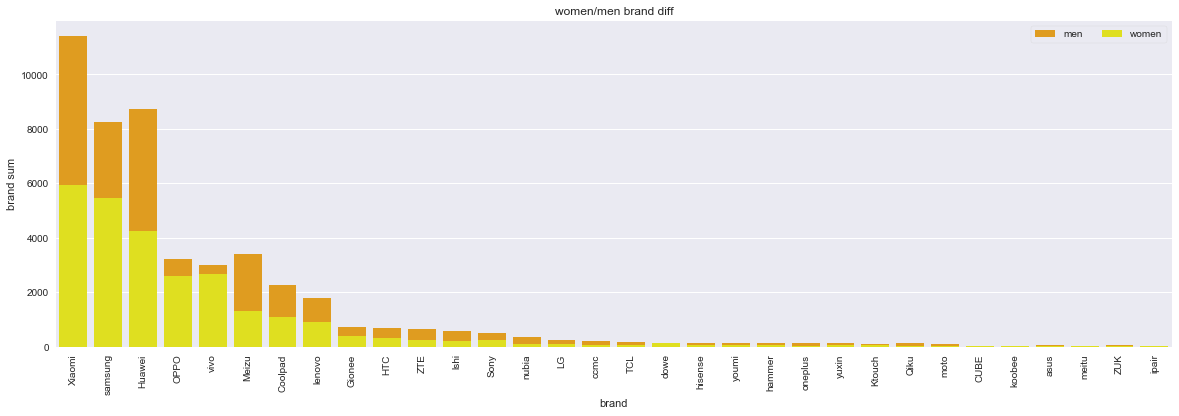

In [22]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize = (20,6))

pm = sns.barplot(g_model_m.loc[:31, 'phone_brand'], g_model_m.loc[:31, 'sum'], color = 'orange', label = 'men')
pw = sns.barplot(g_model_f.loc[:31, 'phone_brand'], g_model_f.loc[:31, 'sum'], color = 'yellow', label = 'women')
#pw = sns.barplot(g_model_f.loc[:31, 'phone_brand'], g_model_f.loc[:31, 'sum'], color = 'green', 
#                 bottom = g_model_m.loc[:31, 'sum'])

plt.ylabel('brand sum')
plt.xlabel('brand')
plt.title('women/men brand diff')
#plt.legend((pm[0], pw[0]) , ('Men', 'Women'))

#plt.show()
ax.legend(ncol = 7, loc='upper right', frameon = True)
plt.xticks(rotation='vertical')
sns.despine(left=True, bottom=True)

In [29]:
events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [44]:
events.loc[(events['device_id']==1508636020748379883)]

,event_id,device_id,timestamp,longitude,latitude
12800,12801,1508636020748379883,2016-05-01 13:12:07,120.26,31.91
45606,45607,1508636020748379883,2016-05-04 13:08:44,120.26,31.90
202641,202642,1508636020748379883,2016-05-04 13:05:26,120.26,31.90
412111,412112,1508636020748379883,2016-05-01 13:06:16,120.26,31.91
526711,526712,1508636020748379883,2016-05-01 21:39:58,120.25,31.89
709013,709014,1508636020748379883,2016-05-04 13:52:36,120.26,31.90
847101,847102,1508636020748379883,2016-05-04 13:07:28,120.26,31.90
847230,847231,1508636020748379883,2016-05-04 13:46:25,120.26,31.90
847231,847232,1508636020748379883,2016-05-04 13:51:12,120.26,31.90
988555,988556,1508636020748379883,2016-05-04 13:51:06,120.26,31.90


In [77]:
even_gen = pd.merge(gender_age_train,events, on = 'device_id')

In [80]:
even_gen['longitude'] = even_gen['longitude'].map(lambda x : np.nan if x == 0.00 else x)
even_gen['latitude'] = even_gen['latitude'].map(lambda x : np.nan if x == 0.00 else x)

In [81]:
even_gen.head(30)

,device_id,gender,age,group,event_id,timestamp,longitude,latitude
0,-8260683887967679142,M,35,M32-38,2479656,2016-05-01 14:23:37,NaN,NaN
1,7477216237379271436,F,37,F33-42,280934,2016-05-04 14:10:03,119.57,31.75
2,7477216237379271436,F,37,F33-42,363585,2016-05-04 14:13:30,119.57,31.75
3,7477216237379271436,F,37,F33-42,935225,2016-05-06 18:51:15,NaN,NaN
4,7477216237379271436,F,37,F33-42,1551108,2016-05-04 14:09:29,119.57,31.75
5,7477216237379271436,F,37,F33-42,1901681,2016-05-04 14:10:00,119.57,31.75
6,7477216237379271436,F,37,F33-42,1969680,2016-05-04 14:08:17,119.59,31.75
7,7477216237379271436,F,37,F33-42,2616450,2016-05-04 14:08:23,119.57,31.75
8,6352067998666467520,M,32,M32-38,7665,2016-05-05 09:36:50,NaN,NaN
9,6352067998666467520,M,32,M32-38,223251,2016-05-05 10:44:38,NaN,NaN


In [82]:
devi_dup = pd.DataFrame(even_gen.device_id.unique())

In [83]:
devi_dup.columns = ['device_id']

In [84]:
# 1개 device_id에 location이 여러개 존재하여 mean으로 변경
devi_dup = even_gen.groupby('device_id', as_index = False).agg({'longitude' : 'mean', 
                                                   'latitude' : 'mean'})

In [70]:
type(devi_dup)

pandas.core.frame.DataFrame

In [85]:
devi_dup.loc[(devi_dup['device_id'] == 7477216237379271436)]

,device_id,longitude,latitude
21117,7477216237379271436,119.573333,31.75


In [86]:
devi_dup.head()

,device_id,longitude,latitude
0,-9222956879900151005,113.240000,23.190000
1,-9221026417907250887,114.362348,30.871515
2,-9220830859283101130,NaN,NaN
3,-9220061629197656378,124.888462,46.618974
4,-9218960997324667698,NaN,NaN


In [87]:
devi_dup_gen = pd.merge(devi_dup, gender_age_train, on = 'device_id')

In [88]:
devi_dup_gen.head()

,device_id,longitude,latitude,gender,age,group
0,-9222956879900151005,113.240000,23.190000,M,36,M32-38
1,-9221026417907250887,114.362348,30.871515,F,31,F29-32
2,-9220830859283101130,NaN,NaN,M,19,M22-
3,-9220061629197656378,124.888462,46.618974,M,40,M39+
4,-9218960997324667698,NaN,NaN,F,53,F43+


In [89]:
devi_dup_gen.shape

(23309, 6)

In [95]:
len(devi_dup_gen['device_id'].unique())

23309

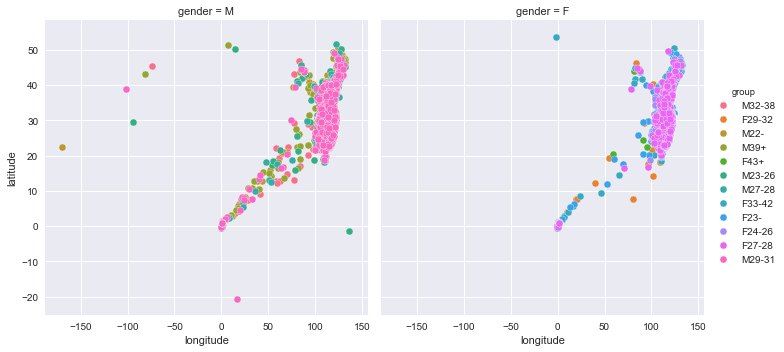

In [154]:
# scatter 


g = sns.FacetGrid(devi_dup_gen, col='gender', hue = 'group', size = 5)
g = (g.map(plt.scatter, 'longitude', 'latitude', edgecolor = 'w').add_legend())


In [101]:
from mpl_toolkits.basemap import Basemap

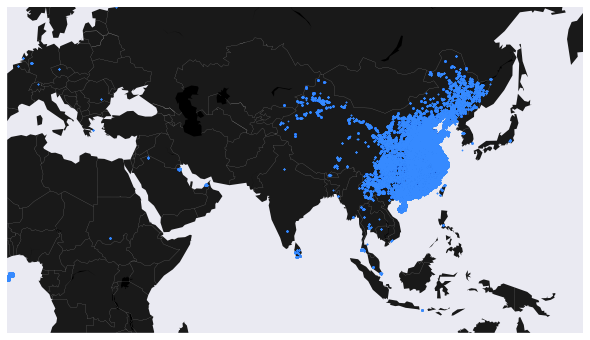

In [148]:
# 원본 값으로 표시한 것

plt.figure(1, figsize=(12,6))

g1 = Basemap(projection = 'merc', llcrnrlon = 0, llcrnrlat = -15, urcrnrlon = 160, urcrnrlat = 60)
g1.fillcontinents(color='#191919', lake_color = '#000000')
g1.drawcountries(linewidth = 0.1, color = 'w')

geo = g1(events['longitude'].tolist(), events['latitude'].tolist())
g1.scatter(geo[0], geo[1], s = 3, c = '#368AFF', lw = 0, alpha = 1, zorder= 5)

plt.show()

In [ ]:
# 위치정보와 

even_gen

In [185]:
app_events['event_id'].min()

-128

In [186]:
app_labels.loc[(app_labels.app_id) == 5927333115845830913]

,app_id,label_id
3152,5927333115845830913,549
8139,5927333115845830913,710
69351,5927333115845830913,704
187954,5927333115845830913,548
430991,5927333115845830913,172


In [164]:
app_labels.head()

,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


In [157]:
even_gen.shape

(1215595, 8)

In [176]:
app_ev_la = pd.merge(app_events, app_labels, on= 'app_id')

In [184]:
app_ev_la['event_id'].min()

-128

In [192]:
app_ev_la_cate = pd.merge(app_ev_la, label_categories, on = 'label_id')

MemoryError: 

In [182]:
app_ev_la_cate.head(250)

,event_id,app_id,is_installed,is_active,label_id,category
0,2,5927333115845830913,1,1,549,Property Industry 1.0
1,6,5927333115845830913,1,1,549,Property Industry 1.0
2,9,5927333115845830913,1,0,549,Property Industry 1.0
3,18,5927333115845830913,1,0,549,Property Industry 1.0
4,25,5927333115845830913,1,0,549,Property Industry 1.0
5,29,5927333115845830913,1,0,549,Property Industry 1.0
6,30,5927333115845830913,1,1,549,Property Industry 1.0
7,35,5927333115845830913,1,0,549,Property Industry 1.0
8,36,5927333115845830913,1,0,549,Property Industry 1.0
9,39,5927333115845830913,1,1,549,Property Industry 1.0


In [188]:
app_la_cate = pd.merge(app_labels, label_categories, on = 'label_id')

In [189]:
app_la_cate.head()

,app_id,label_id,category
0,7324884708820027918,251,Finance
1,-4494216993218550286,251,Finance
2,8756705988821000489,251,Finance
3,1061207043315821111,251,Finance
4,-1491198667294647703,251,Finance


In [198]:
app_la_cate.loc[(app_events['app_id'] == 5927333115845830913)]

,app_id,label_id,category
0,7324884708820027918,251,Finance
21,-5652776690094847726,251,Finance
101,8168926443695054930,251,Finance
164,8715703480896853990,251,Finance
233,8917651371907603156,251,Finance
265,-6143812343292230521,251,Finance
278,-7063648962755669471,251,Finance
301,8303547739259807425,251,Finance
328,1506559851173508439,251,Finance
341,6539267374478795827,251,Finance


In [199]:
app_events.loc[(app_events['app_id'] == 5927333115845830913)]

KeyboardInterrupt: 